# OrthoSAM examples

In [1]:
import json
import os
import sys
from utility import load_config,create_dir_ifnotexist, prompt_fid,load_image, plot_tiling_with_overlap

**This example will process a single image from the imagegrains library (https://github.com/dmair1989/imagegrains/tree/main) available here: https://github.com/dmair1989/imagegrains/blob/main/demo_data/K1/K1_C2_385.jpg**


Place the image into `data/imagegrains/K1`.

In the first step, we set parameters and create the list of files. If you set `id=None`, all files in the directory listed in 'DatasetName' will be processed. If you only want to process a single image, you either give the filename or the number of the file in the field 'fid'. *For this example, we only work with the first image (id=0).*

In [46]:
id=0 # Filename or the index after sorting by file name. If not known input None and all files will be listed with the index.
# For this example, we only work with the first image (id=0).

#main_para defines the parameters for the first layer
#it also serves as a template for the later layers.
main_para={'OutDIR': f'imagegrains/K1/K1_{id}_up2_org',# where output will be stored relative to the MainOutDIR stored in config.json
    'DatasetName': 'imagegrains/K1',#where image is stored
    'fid': id, #Filename or the index after sorting by file name. If index is not known use None and all files will be listed with the index.
    'resolution(mm)': 1, #image resolution in mm/pixel
    'tile_size': 1024,
    'tile_overlap':200,
    'resample_factor': 1, #'Auto': auto select resample rate.
    'input_point_per_axis': 30,
    'dilation_size':5,
    'stability_t':0.85,
    'expected_min_size(sqmm)': 500,
    'min_radius': 0,
    'Calculate_stats': True, # True: calculate statistics. 
    'Discord_notification': False,# True: send discord when finished. If you wish to use this feature, please create a file name DWH.txt in the code directory and set the webhook.
    'Plotting': True# True: plot the results
    }

#para_list defines the parameters for the later layers
#each dictionary corresponds to one layer.
# The first layer is defined in main_para.
#the second layer is defined in para_list[0] and so on.
#main_para serves as a template for the later layers.
#and in para_list specify the parameters for each layer that need to be updated.
para_list=[
    {'resample_factor':0.5, #Using half of the resolution (half as many pixels) is a good starting point for a resampling factor.
    }
    ]

#parameters for preprocessing. Only create this list if you want to use preprocessing.
#preprocessing is optional.
pre_para_list=[{#'Gaussian': {'kernel size':3},
                #'CLAHE':{'clip limit':2},
                #'Resample': {'fxy':4},
                #'Buffering': {'crop size': crop_size}
            },{},{}]

You can verify the parameters by looking at the dictonaries

In [47]:
main_para

{'OutDIR': 'imagegrains/K1/K1_0_up2_org',
 'DatasetName': 'imagegrains/K1',
 'fid': 0,
 'resolution(mm)': 1,
 'tile_size': 1024,
 'tile_overlap': 200,
 'resample_factor': 1,
 'input_point_per_axis': 30,
 'dilation_size': 5,
 'stability_t': 0.85,
 'expected_min_size(sqmm)': 500,
 'min_radius': 0,
 'Calculate_stats': True,
 'Discord_notification': False,
 'Plotting': True}

In [48]:
main_para['1st_resample_factor'] = main_para['resample_factor']
config = load_config()
main_para={**config,**main_para}
main_para['OutDIR'] = os.path.join(main_para.get('MainOutDIR'), main_para.get('OutDIR'))
if not os.path.exists(os.path.join(main_para.get('DataDIR'), main_para.get('DatasetName'))):
    print('Input directory does not exist. Exiting script.')
    sys.exit()

OutDIR=main_para.get('OutDIR')
create_dir_ifnotexist(OutDIR)
if main_para.get('fid')==None:
    main_para=prompt_fid(main_para)

/home/bodo/OrthoSAM/data/imagegrains/K1/K1_C2_385.jpg imported


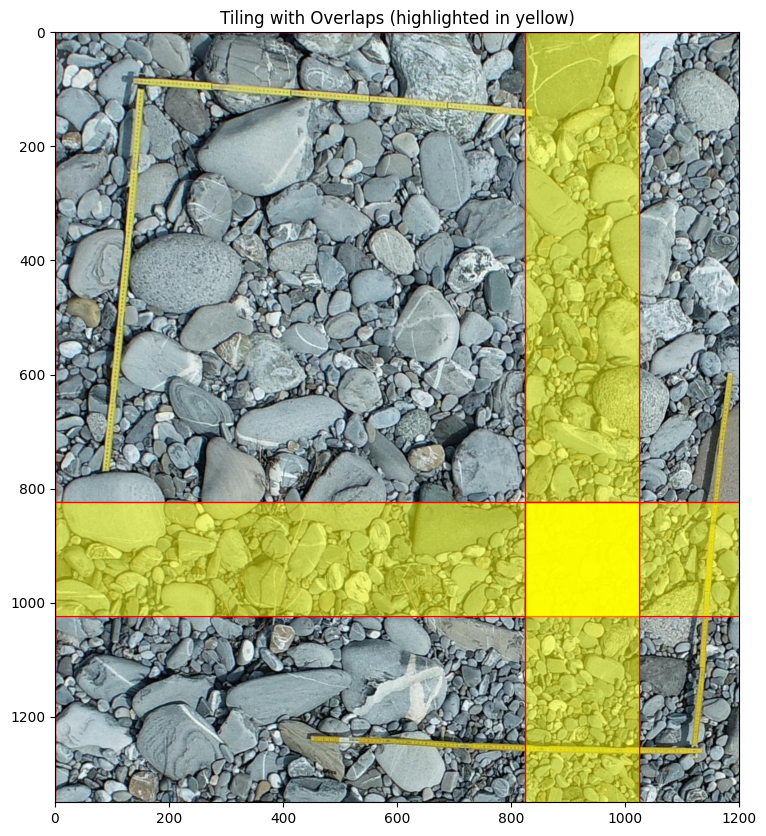

In [49]:
import matplotlib.pyplot as plt
DataDIR = main_para.get('DataDIR')
DSname = main_para.get('DatasetName')
fid = main_para.get('fid')
crop_size = main_para.get('tile_size')
overlap = main_para.get('tile_overlap')
image=load_image(DataDIR,DSname,fid)

plt.figure(figsize=(15,10))
plot_tiling_with_overlap(image, (crop_size,crop_size), overlap)

In [50]:
# Save init_para to a JSON file
para_list.insert(0, {})
pass_para_list = [dict(main_para, **para) for para in para_list]
with open(OutDIR+f'init_para.json', 'w') as json_file:
    json.dump(pass_para_list, json_file, indent=4)
with open(OutDIR+f'pre_para.json', 'w') as json_file:
    json.dump(pre_para_list, json_file, indent=4)

2025-08-20 08:25:39,275 - INFO - ---------------
2025-08-20 08:25:39,276 - INFO - Layer 0
2025-08-20 08:25:39,277 - INFO - 	Segment tiles
2025-08-20 08:25:39,279 - INFO - 	Loaded parameters from json
2025-08-20 08:25:39,279 - INFO - {'MODEL_TYPE': 'vit_h', 'CheckpointDIR': '/home/bodo/OrthoSAM/MetaSAM', 'DataDIR': '/home/bodo/OrthoSAM/data', 'BaseDIR': '/home/bodo/OrthoSAM', 'MainOutDIR': '/home/bodo/OrthoSAM/output', 'OutDIR': '/home/bodo/OrthoSAM/output/imagegrains/K1/K1_0_up2_org', 'DatasetName': 'imagegrains/K1', 'fid': 0, 'resolution(mm)': 1, 'tile_size': 1024, 'tile_overlap': 200, 'resample_factor': 1, 'input_point_per_axis': 30, 'dilation_size': 5, 'stability_t': 0.85, 'expected_min_size(sqmm)': 500, 'min_radius': 0, 'Calculate_stats': True, 'Discord_notification': False, 'Plotting': True, '1st_resample_factor': 1}
2025-08-20 08:25:39,281 - INFO - 	Minimum expected size: 500.0 pixel
2025-08-20 08:25:39,281 - INFO - 	No pre_para found. Only applying resampling.
2025-08-20 08:25:3

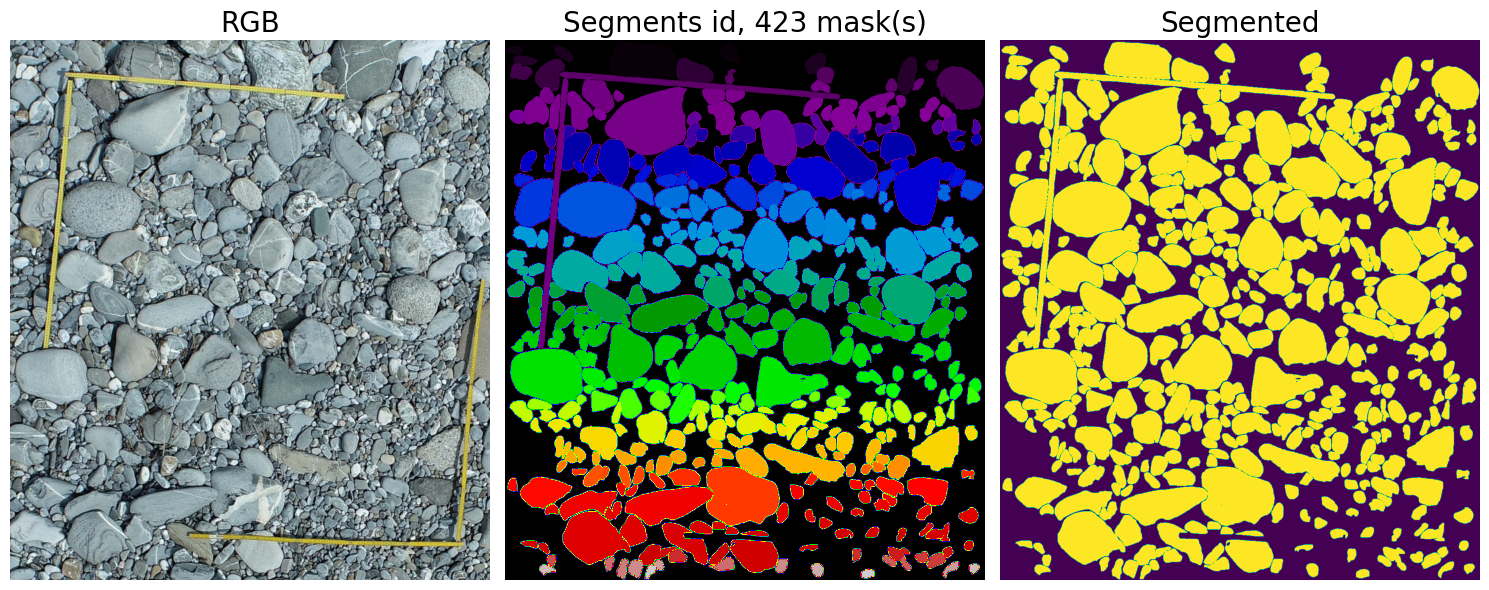

2025-08-20 08:27:24,097 - INFO - 	script took: 2.25 seconds
2025-08-20 08:27:24,098 - INFO - 	Merging completed.
2025-08-20 08:27:24,099 - INFO - ---------------
2025-08-20 08:27:24,100 - INFO - ---------------
2025-08-20 08:27:24,101 - INFO - Layer 1
2025-08-20 08:27:24,101 - INFO - 	Loaded parameters from /home/bodo/OrthoSAM/output/imagegrains/K1/K1_0_up2_org
2025-08-20 08:27:24,102 - INFO - {'MODEL_TYPE': 'vit_h', 'CheckpointDIR': '/home/bodo/OrthoSAM/MetaSAM', 'DataDIR': '/home/bodo/OrthoSAM/data', 'BaseDIR': '/home/bodo/OrthoSAM', 'MainOutDIR': '/home/bodo/OrthoSAM/output', 'OutDIR': '/home/bodo/OrthoSAM/output/imagegrains/K1/K1_0_up2_org', 'DatasetName': 'imagegrains/K1', 'fid': 0, 'resolution(mm)': 1, 'tile_size': 1024, 'tile_overlap': 200, 'resample_factor': 0.5, 'input_point_per_axis': 30, 'dilation_size': 5, 'stability_t': 0.85, 'expected_min_size(sqmm)': 500, 'min_radius': 0, 'Calculate_stats': True, 'Discord_notification': False, 'Plotting': True, '1st_resample_factor': 1}


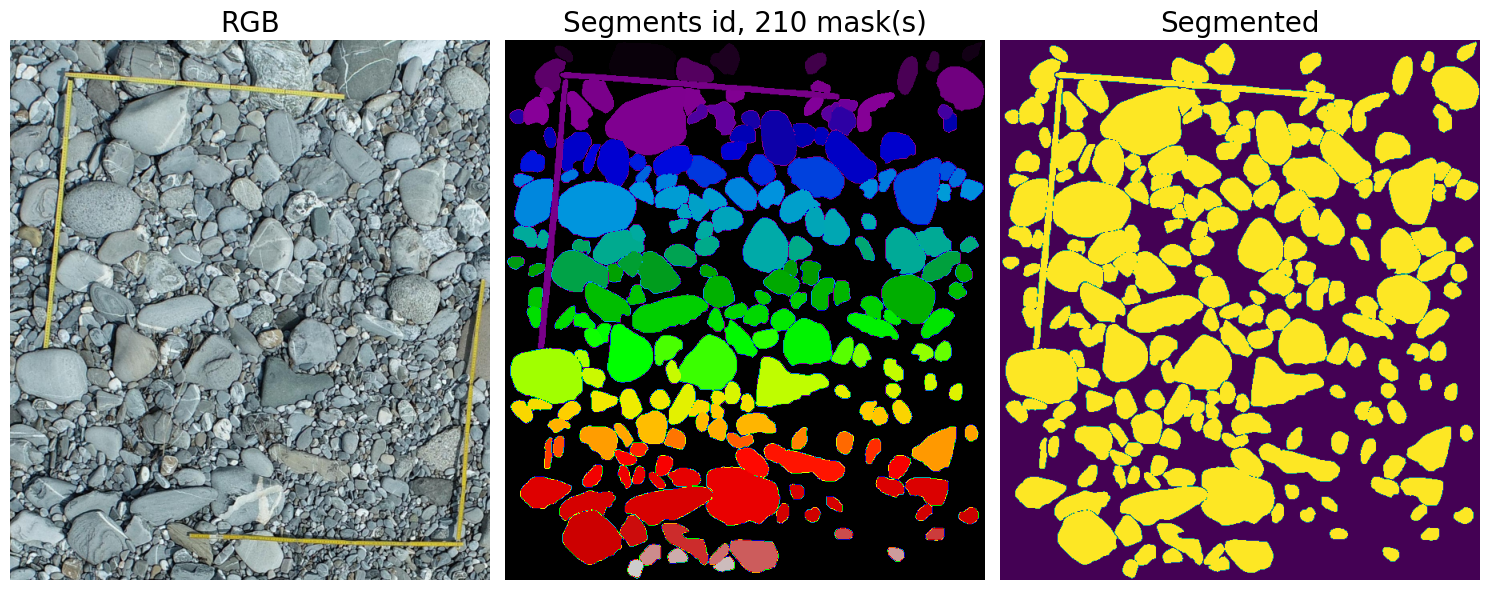

2025-08-20 08:27:41,895 - INFO - 	script took: 0.85 seconds
2025-08-20 08:27:41,895 - INFO - 	Merging completed.
2025-08-20 08:27:41,895 - INFO - ---------------
2025-08-20 08:27:41,918 - INFO - 
2025-08-20 08:27:41,918 - INFO -   0%|          | 0/211 [00:00<?, ?id/s]
2025-08-20 08:27:41,919 - INFO - 
2025-08-20 08:27:41,919 - INFO - 100%|##########| 211/211 [00:00<00:00, 400451.65id/s]
2025-08-20 08:27:41,924 - INFO - 	Layer 001 discovered 4 new mask(s)
2025-08-20 08:27:41,989 - INFO - 
2025-08-20 08:27:41,990 - INFO -   0%|          | 0/427 [00:00<?, ?it/s]
2025-08-20 08:27:42,090 - INFO - 
2025-08-20 08:27:42,091 - INFO -  41%|####      | 175/427 [00:00<00:00, 1742.58it/s]
2025-08-20 08:27:42,191 - INFO - 
2025-08-20 08:27:42,192 - INFO -  82%|########1 | 350/427 [00:00<00:00, 1740.06it/s]
2025-08-20 08:27:42,235 - INFO - 
2025-08-20 08:27:42,236 - INFO - 100%|##########| 427/427 [00:00<00:00, 1740.76it/s]


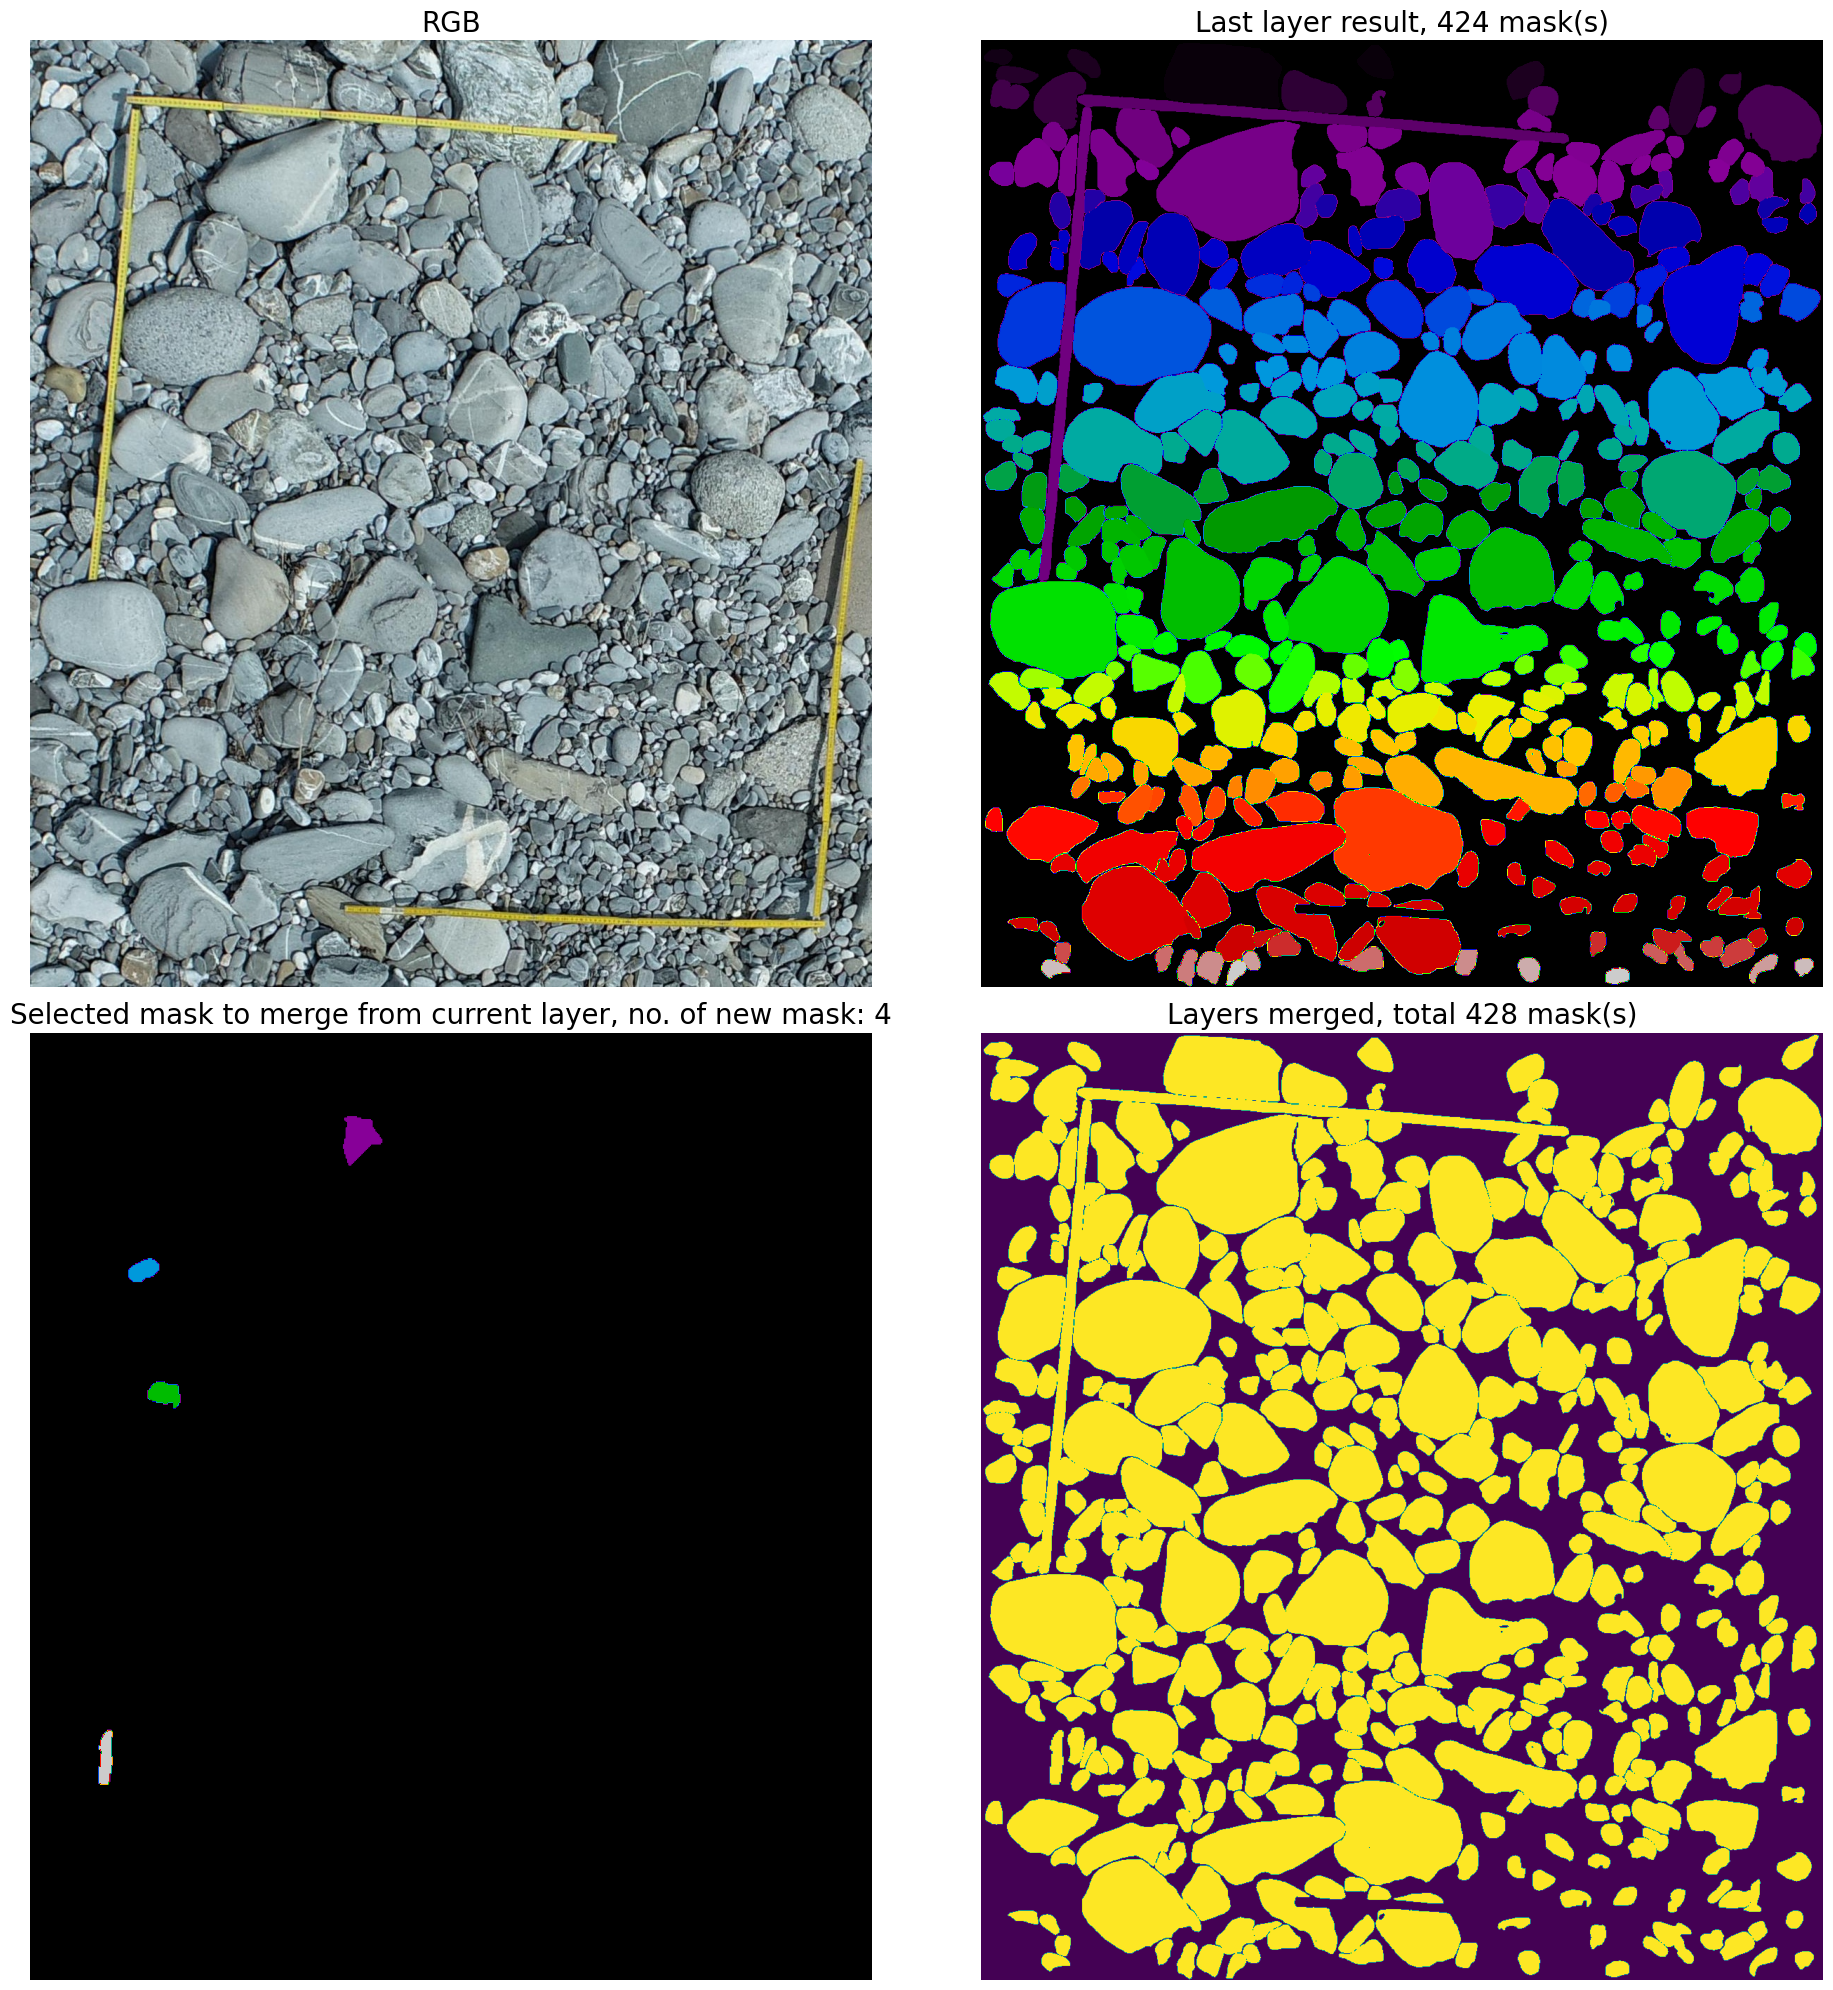

2025-08-20 08:27:44,326 - INFO - 	Saving id mask to /home/bodo/OrthoSAM/output/imagegrains/K1/K1_0_up2_org/Merged/Merged_Layers_001.npy...
2025-08-20 08:27:44,334 - INFO - 	Saved
2025-08-20 08:27:44,335 - INFO - 	script took: 20.24 seconds
2025-08-20 08:27:44,336 - INFO - 	Output saved to /home/bodo/OrthoSAM/output/imagegrains/K1/K1_0_up2_org
2025-08-20 08:27:44,337 - INFO - ---------------
2025-08-20 08:27:44,337 - INFO - Run took: 2.08 minutes
2025-08-20 08:27:44,337 - INFO - Calculating statistics...
2025-08-20 08:27:44,347 - INFO - /home/bodo/OrthoSAM/data/imagegrains/K1/K1_C2_385.jpg imported
2025-08-20 08:27:44,352 - INFO - /home/bodo/OrthoSAM/output/imagegrains/K1/K1_0_up2_org/Merged/Merged_Layers_001.npy imported
2025-08-20 08:27:44,762 - INFO - Statistics saved to props.csv


In [51]:
from OrthoSAM import orthosam
orthosam(pass_para_list)

# Verify results and plot

Here we do some first-oder analysis of the output statistic data.

In [52]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

merged_results = pd.read_csv('/home/bodo/OrthoSAM/output/imagegrains/K1/K1_0_up2_org/props.csv')

In [53]:
merged_results.head()

label  centroid-0   centroid-1  axis_major_length  axis_minor_length  \
0      1   29.438944  1165.635644          61.332919          32.540560   
1      2   52.175230   344.575335         181.064021          96.209208   
2      3   33.611561   562.907514          55.388450          41.080392   
3      4   24.636107    25.040903          41.104158          22.357357   
4      5   33.778656   147.095652          57.517388          28.175159   

      area   perimeter        IR         h       IRt       IRn      mean_R  \
0   1515.0  165.681241  0.693547  0.094074  0.864532  0.802222  137.854125   
1  13274.0  481.036580  0.720868  0.093656  0.865109  0.833268  125.960148   
2   1730.0  160.752309  0.841282  0.021998  0.967318  0.869705  152.120231   
3    709.0  104.669048  0.813242  0.087264  0.873970  0.930514  116.231312   
4   1265.0  144.953319  0.756561  0.117247  0.832835  0.908417  122.261660   

       mean_G      mean_B  median_R  median_G  median_B  
0  147.149835  144.645545     145.0     154.0     149.0  
1  138.399126  138.774522     134.0     147.0     147.0  
2  164.784971  164.966474     149.0     162.0     160.0  
3  134.328632  139.809591     120.0     137.0     139.0  
4  141.718577  148.362846     119.0     141.0     147.0

In [54]:
len(merged_results)

426

In [55]:
merged_results.describe()

/home/bodo/miniconda3/envs/OrthoSAM/lib/python3.11/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


label   centroid-0   centroid-1  axis_major_length  \
count  426.00000   426.000000   426.000000         426.000000   
mean   213.50000   709.719601   608.730439          61.654356   
std    123.11986   363.563142   342.906992          60.814600   
min      1.00000    24.636107    18.888406           4.472136   
25%    107.25000   399.618634   309.191824          36.891784   
50%    213.50000   724.322861   589.419637          46.567056   
75%    319.75000  1001.450665   916.751118          63.989255   
max    426.00000  1333.800609  1178.506616         813.573622   

       axis_minor_length          area    perimeter          IR           h  \
count         426.000000    426.000000   426.000000  426.000000  426.000000   
mean           36.648418   2161.727700   169.476581    0.798260    0.070552   
std            22.211971   3216.567452   131.745747    0.582735    0.099701   
min             0.000000      4.000000     2.000000    0.060615    0.000114   
25%            23.761759    678.250000   104.669048    0.721113    0.019013   
50%            28.586888    988.000000   127.932504    0.790374    0.043759   
75%            40.286418   1878.500000   179.546465    0.848963    0.088838   
max           155.154161  24404.000000  1467.504617   12.566371    1.000000   

              IRt         IRn      mean_R      mean_G      mean_B    median_R  \
count  426.000000  426.000000  426.000000  426.000000  426.000000  426.000000   
mean     0.902672         inf  134.105682  149.299582  152.148665  138.865023   
std      0.115928         NaN   24.148498   24.096263   24.068894   26.438674   
min      0.000000    0.524030   53.200997   67.524917   69.821573   41.500000   
25%      0.871784    0.814645  117.748004  133.673460  136.430027  122.000000   
50%      0.935601    0.868375  135.420282  151.286028  153.599510  139.000000   
75%      0.971717    0.905154  150.712771  166.235367  169.515299  154.750000   
max      0.999829         inf  205.005769  214.842308  216.959615  216.000000   

         median_G    median_B  
count  426.000000  426.000000  
mean   154.750000  157.126761  
std     26.409474   26.409185  
min     59.000000   69.000000  
25%    138.000000  141.000000  
50%    156.500000  160.000000  
75%    171.375000  175.000000  
max    225.000000  227.000000

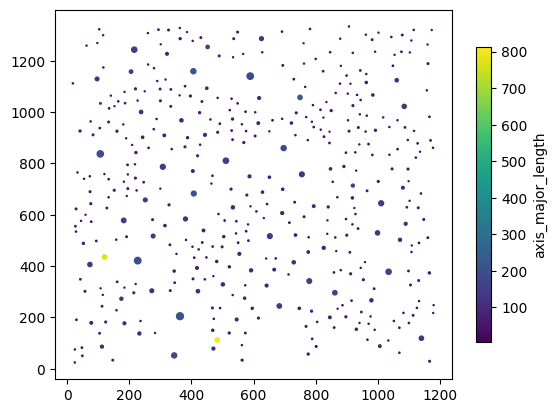

In [56]:
plt.scatter(merged_results['centroid-1'], merged_results['centroid-0'], c=merged_results['axis_major_length'], s=merged_results['area']/1000, cmap='viridis')
h = plt.colorbar(shrink=0.8)
h.set_label('axis_major_length')

## Loading labeled images

In [57]:
merged_img = np.load('/home/bodo/OrthoSAM/output/imagegrains/K1/K1_0_up2_org/Merged/Merged_Layers_001.npy')

In [58]:
merged_img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(1350, 1200))

In [59]:
#convert to float and then set background to nan
merged_img = merged_img.astype(np.float32)

In [60]:
merged_img[merged_img == 0.0] = np.nan

In [61]:
len(np.unique(merged_img[~np.isnan(merged_img)]))

427

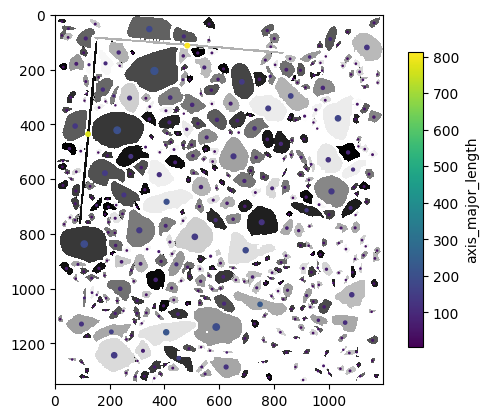

In [62]:
vals = np.linspace(0,1,256)
np.random.shuffle(vals)
cmap = plt.cm.colors.ListedColormap(plt.cm.gray(vals))
plt.imshow(merged_img, cmap=cmap)

plt.scatter(merged_results['centroid-1'], merged_results['centroid-0'], c=merged_results['axis_major_length'], s=merged_results['area']/1000, cmap='viridis')
h = plt.colorbar(shrink=0.8)
h.set_label('axis_major_length')

## Filter out pebbles by size

We see that the major axis length for the two segments of the measurement stick are not part of the relevant size distribution. These can be removed by filtering with the axis length. We replot the image with the major axis length.

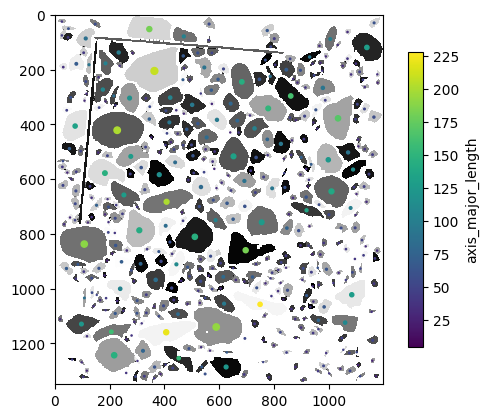

In [63]:
merged_results = merged_results[merged_results['axis_major_length'] < 600]

vals = np.linspace(0,1,256)
np.random.shuffle(vals)
cmap = plt.cm.colors.ListedColormap(plt.cm.gray(vals))
plt.imshow(merged_img, cmap=cmap)

plt.scatter(merged_results['centroid-1'], merged_results['centroid-0'], c=merged_results['axis_major_length'], s=merged_results['area']/1000, cmap='viridis')
h = plt.colorbar(shrink=0.8)
h.set_label('axis_major_length')

## Filter out pebbles with a roundness metric (isoperimetric ratio)

There are different ways to remove objects from the database that are no pebbles. You can do this manually by looking at the labelled images (see next point) - but this will be tidious when there are many pebbles. In this example, we rely on a roundness factor (see relevant publications cited in the main manuscript, including Cox, 1927; Pokhrel et al., 2024; Roussillon et al., 2009. The isoperimetric ratio is defined as the ratio of the area in 2D to its perimeter. This metric is dependent on the shape of the pebble, and hence a normalized isoperimetric ratio (IRn) has been developed that removes (partly) a shape dependence. The IRn is the isoperimetric ratio divided by a maximum theoretical isoperimetric ratio (IRt). 

In our output database, we provide all variants of the  isoperimetric ratio. For example, we can color each centroid by its IRn:

/home/bodo/OrthoSAM/data/imagegrains/K1/K1_C2_385.jpg imported


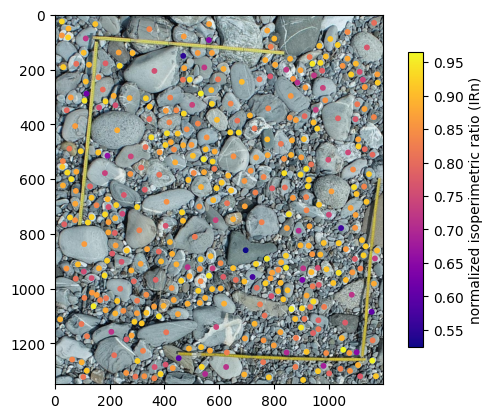

In [70]:
image = load_image(DataDIR,DSname,fid)
plt.imshow(image)

plt.scatter(merged_results['centroid-1'], merged_results['centroid-0'], c=merged_results['IRn'], s=10, cmap='plasma')
h = plt.colorbar(shrink=0.8)
h.set_label('normalized isoperimetric ratio (IRn)')

**We see that we have several pebbles with a very low IRn. Let's pick out all pebbles with an IRn below 0.6:**

In [71]:
merged_results[merged_results['IRn'] < 0.6]

label   centroid-0   centroid-1  axis_major_length  axis_minor_length  \
24      25   150.109589   468.500000          66.597267          50.171851   
234    235   778.821611  1044.994246          56.090053          39.501690   
240    241   859.890543   696.519621         182.483653         113.702410   
296    297   957.601271   721.606356          69.785072          53.253634   
356    357  1084.895765  1156.684039          37.423672          23.477841   
387    388  1254.093255   451.981847         154.439982          52.308708   

        area   perimeter        IR         h       IRt       IRn      mean_R  \
24    2336.0  234.911688  0.531953  0.019787  0.970575  0.548080  128.980308   
234   1564.0  190.994949  0.538769  0.030114  0.955419  0.563909  139.882353   
240  13302.0  588.516811  0.482624  0.053928  0.920986  0.524030  107.278154   
296   2360.0  231.379726  0.553951  0.018053  0.973134  0.569244  149.196610   
356    614.0  118.183766  0.552411  0.052436  0.923121  0.598417  167.403909   
387   5619.0  421.847763  0.396787  0.244024  0.670285  0.591967  130.585513   

         mean_G      mean_B  median_R  median_G  median_B  
24   146.324058  151.906250     131.0     149.0     155.0  
234  158.111893  162.689898     146.0     164.0     169.0  
240  127.766952  128.698617     110.0     132.0     133.0  
296  170.735593  177.338136     154.0     176.0     183.0  
356  179.439739  178.382736     174.0     187.5     185.5  
387  136.452750  124.733405     138.0     144.0     131.0

In [72]:
merged_img_IRn06 = np.empty_like(merged_img)
merged_img_IRn06.fill(np.nan)
IRn06_df = merged_results[merged_results['IRn'] < 0.6]

for i in range(len(IRn06_df)):
    merged_img_IRn06[merged_img == IRn06_df.iloc[i]['label']] = IRn06_df.iloc[i]['label']

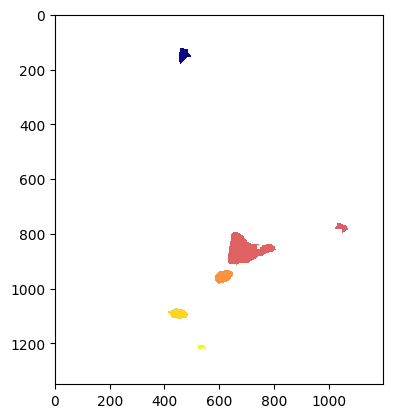

In [73]:
plt.imshow(merged_img_IRn06, cmap='plasma')

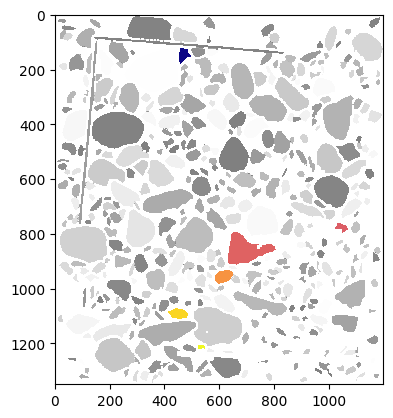

In [74]:
vals = np.linspace(0.5,1,256)
np.random.shuffle(vals)
cmap = plt.cm.colors.ListedColormap(plt.cm.gray(vals))
plt.imshow(merged_img, cmap=cmap)

plt.imshow(merged_img_IRn06, cmap='plasma')


## Plot size distribution

In [75]:
IRnabove06_df = merged_results[merged_results['IRn'] >= 0.6]
print(len(IRnabove06_df))
IRnabove06_df.head()

418


label  centroid-0   centroid-1  axis_major_length  axis_minor_length  \
0      1   29.438944  1165.635644          61.332919          32.540560   
1      2   52.175230   344.575335         181.064021          96.209208   
2      3   33.611561   562.907514          55.388450          41.080392   
3      4   24.636107    25.040903          41.104158          22.357357   
4      5   33.778656   147.095652          57.517388          28.175159   

      area   perimeter        IR         h       IRt       IRn      mean_R  \
0   1515.0  165.681241  0.693547  0.094074  0.864532  0.802222  137.854125   
1  13274.0  481.036580  0.720868  0.093656  0.865109  0.833268  125.960148   
2   1730.0  160.752309  0.841282  0.021998  0.967318  0.869705  152.120231   
3    709.0  104.669048  0.813242  0.087264  0.873970  0.930514  116.231312   
4   1265.0  144.953319  0.756561  0.117247  0.832835  0.908417  122.261660   

       mean_G      mean_B  median_R  median_G  median_B  
0  147.149835  144.645545     145.0     154.0     149.0  
1  138.399126  138.774522     134.0     147.0     147.0  
2  164.784971  164.966474     149.0     162.0     160.0  
3  134.328632  139.809591     120.0     137.0     139.0  
4  141.718577  148.362846     119.0     141.0     147.0

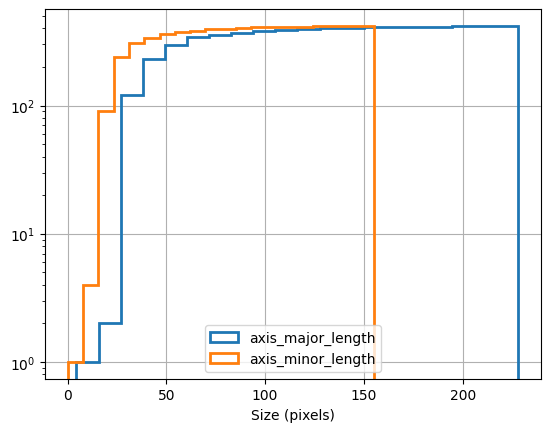

In [77]:
IRnabove06_df.axis_major_length.hist(bins = 20, log = True, cumulative=True, alpha=1, label='axis_major_length', histtype='step', linewidth=2) #density=True
IRnabove06_df.axis_minor_length.hist(bins = 20, log = True, cumulative=True, alpha=1, label='axis_minor_length', histtype='step', linewidth=2) #density=True
plt.xlabel('Size (pixels)')
plt.legend()